# Deepfake Detection

### CSEC620 - Project 3 - Mehul Sen

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_auc_score, classification_report

In [3]:
X_file = 'Dataset/X_data.npy'
Y_file = 'Dataset/Y_data.npy'

# Load X and y
X = np.load(X_file)
y = np.load(Y_file)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=0.0001)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
cnn_model_path = "Models/cnn_model.keras"

if os.path.exists(cnn_model_path):
    print("Loading existing model...")
    model = keras.models.load_model(cnn_model_path)
else:
    print("Training new model...")
    if not os.path.exists("Models"):
        os.mkdir("Models")
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])    
    # Save the model
    model.save(cnn_model_path)

# Evaluate the model
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print test accuracy
print('Test accuracy:', score[1])
# Classification report
print(classification_report(y_test, y_pred_binary))
# ROC AUC score
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

Epoch 1/50
434/434 [==============================] - 550s 1s/step - loss: 0.1531 - accuracy: 0.9385 - val_loss: 5.1776 - val_accuracy: 0.7272 - lr: 1.0000e-04
Epoch 2/50
434/434 [==============================] - 555s 1s/step - loss: 0.1451 - accuracy: 0.9409 - val_loss: 0.7578 - val_accuracy: 0.9281 - lr: 1.0000e-04
Epoch 3/50
434/434 [==============================] - 521s 1s/step - loss: 0.1352 - accuracy: 0.9458 - val_loss: 0.7772 - val_accuracy: 0.9190 - lr: 1.0000e-04
Epoch 4/50
434/434 [==============================] - 552s 1s/step - loss: 0.1198 - accuracy: 0.9529 - val_loss: 0.3580 - val_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 5/50
434/434 [==============================] - 540s 1s/step - loss: 0.1206 - accuracy: 0.9491 - val_loss: 0.2273 - val_accuracy: 0.9462 - lr: 1.0000e-04
Epoch 6/50
434/434 [==============================] - 528s 1s/step - loss: 0.1148 - accuracy: 0.9537 - val_loss: 0.4181 - val_accuracy: 0.9119 - lr: 1.0000e-04
Epoch 7/50
434/434 [====================

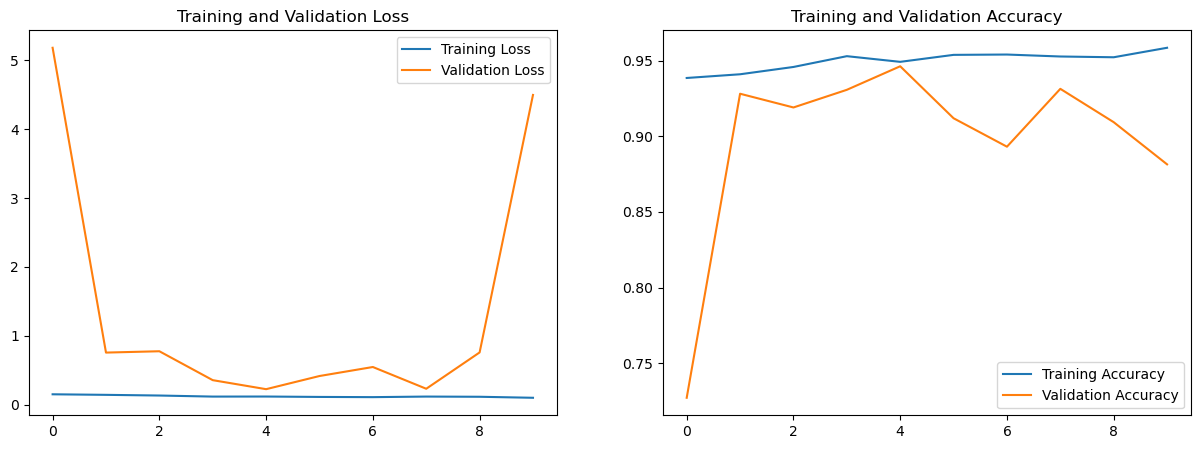

In [14]:
# Plot the training and validation loss + accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()